# LDA Dimensionality Reduction

In [2]:
''' Required libraries '''

import numpy as np # For matrix operations
import matplotlib.pyplot as plt # For plotting
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # For comparison
import os, sys # For filepaths

In [3]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
libraries_path = os.path.join(home_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

In [4]:
''' Import our implementation of PCA '''

from ajp import lda_ajp

In [5]:
''' Load the dataset '''

dataset = np.load(os.path.join(datasets_path, 'fashion_train.npy'))  # Load dataset
print("Dataset shape: ", dataset.shape) # Print dataset shape (10000, 785)

Dataset shape:  (10000, 785)


In [6]:
''' Define X (images) and y (labels) '''

X = dataset[:, :-1] # Define X as all columns except the last one
y = dataset[:, -1] # Define y as the last column

print("X shape: ", X.shape) # Print X shape (10000, 784)
print("y shape: ", y.shape) # Print y shape (10000,)

X shape:  (10000, 784)
y shape:  (10000,)


In [7]:
''' Running LDAs'''

# Running our LDA
lda = lda_ajp(X, y) # Initialize our LDA
top_components = lda.main_lds(2) # Get first 2 LDA components
X_lda = lda.projection_matrix() # Project X onto the LDA space

print("X_lda shape: ", X_lda.shape) # Print X_lda shape (10000, 2)


# Running sklearn's LDA
sklearn_lda_eigen = LinearDiscriminantAnalysis(n_components=2, solver='eigen') # Initialize sklearn's LDA with 2 components and eigen solver
sklearn_lda_eigen.fit(X, y) # Fit sklearn's LDA with eigen solver
X_lda_sklearn = sklearn_lda_eigen.transform(X) # Project X onto the LDA space

print("X_lda_sklearn shape: ", X_lda_sklearn.shape) # Print X_lda_sklearn shape (10000, 2)

X_lda shape:  (10000, 2)
X_lda_sklearn shape:  (10000, 2)


In [8]:
''' Exporting main components to file '''
np.save(os.path.join(datasets_path, 'LDA_top2'), top_components) # Export top_components to file

''' Export the projection matrix to file '''
np.save(os.path.join(datasets_path, 'LDA_projection'), X_lda) # Export X_lda to file

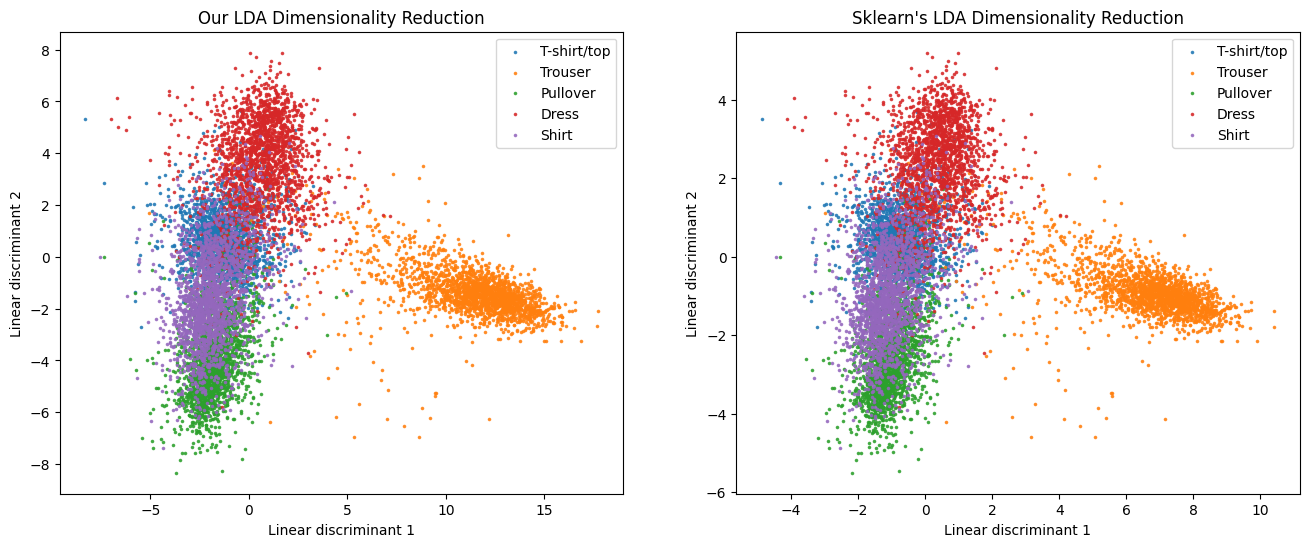

In [9]:
''' Plotting '''

# Labels dictionary
labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

plt.figure(figsize=(16, 6))

# Plotting our LDA
plt.subplot(1, 2, 1)
for label_value, label_name in labels_dict.items():
    mask = (y == label_value)
    plt.scatter(X_lda[mask, 0], X_lda[mask, 1], label=label_name, s=10, alpha=0.8, marker='.', linewidths=1)

plt.title('Our LDA Dimensionality Reduction')
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend()

# Plotting sklearn's LDA
plt.subplot(1, 2, 2)
for label_value, label_name in labels_dict.items():
    mask = (y == label_value)
    plt.scatter(X_lda_sklearn[mask, 0], X_lda_sklearn[mask, 1], label=label_name, s=10, alpha=0.8, marker='.', linewidths=1)

plt.title("Sklearn's LDA Dimensionality Reduction")
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend()

plt.show()

In [10]:
''' Calculating LDAs with 3 components '''

# Running our LDA with 3 components
X_lda_3d = lda.projection_matrix(3) # Project X onto the LDA space

# Running sklearn's LDA with 3 components
sklearn_lda_eigen = LinearDiscriminantAnalysis(n_components=3, solver='eigen') # Initialize sklearn's LDA with 3 components and eigen solver
sklearn_lda_eigen.fit(X, y) # Fit sklearn's LDA with eigen solver
X_lda_sklearn_3d = sklearn_lda_eigen.transform(X) # Project X onto the LDA space

In [21]:
''' Plotting but in 3D '''

from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)

# Labels dictionary for colors
color_map = {
    0: 'rgb(55, 133, 188)',
    1: 'rgb(255, 140, 39)',
    2: 'rgb(66, 170, 66)',
    3: 'rgb(218, 62, 63)',
    4: 'rgb(159, 119, 195)'
}

# Plotting
f = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=("Our LDA Dimensionality Reduction", "Sklearn's LDA Dimensionality Reduction")
)

for label_value, label_name in labels_dict.items():
    mask = (y == label_value)
    f.append_trace(
        go.Scatter3d(
            x=X_lda_3d[mask, 0],
            y=X_lda_3d[mask, 1],
            z=X_lda_3d[mask, 2],
            mode='markers',
            marker=dict(
                size=1,
                color=[color_map[label_value] for label_value in y[mask]],
                opacity=0.8
            ),
            showlegend=True,
            name=label_name
        ),
        row=1, col=1
    )

    f.append_trace(
        go.Scatter3d(
            x=X_lda_sklearn_3d[mask, 0],
            y=X_lda_sklearn_3d[mask, 1],
            z=X_lda_sklearn_3d[mask, 2],
            mode='markers',
            marker=dict(
                size=1,
                color=[color_map[label_value] for label_value in y[mask]],
                opacity=0.8
            ),
            showlegend=False,
            name=label_name
        ),
        row=1, col=2
    )

f.update_layout(
    height=600,
    width=1200,
    title_text="Comparison between implementations of LDA"
)

fig = go.FigureWidget(f)

def cam_change(layout, camera):
    fig.layout.scene2.camera = camera

fig.layout.scene1.on_change(cam_change, 'camera')

fig

FigureWidget({
    'data': [{'marker': {'color': [rgb(55, 133, 188), rgb(55, 133, 188), rgb(55,
                                   133, 188), ..., rgb(55, 133, 188), rgb(55, 133,
                                   188), rgb(55, 133, 188)],
                         'opacity': 0.8,
                         'size': 1},
              'mode': 'markers',
              'name': 'T-shirt/top',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'uid': 'a4d88ae1-38bf-4c8e-aa2f-3e2a8dde77bb',
              'x': array([-3.07223488, -2.01820464,  1.05690852, ..., -3.67969582, -1.44279916,
                          -1.13898392]),
              'y': array([ 0.32388237,  0.22135341, -1.86188534, ...,  1.97207237, -0.24075468,
                           0.83199906]),
              'z': array([-2.32287264, -5.17748203, -4.51689325, ..., -3.5175254 , -1.88044495,
                          -2.27893823])},
             {'marker': {'color': [rgb

### Below: comparison between SciKitLearn's LDA and our implementation of LDA

In [12]:
''' Initialize our implementation of LDA '''
lda = lda_ajp(X, y)

In [13]:
''' Initialize sklearn's implementations of LDA '''
sklearn_lda_eigen = LinearDiscriminantAnalysis(n_components=2, solver='eigen') # Initialize sklearn's LDA with 2 components and eigen solver (to compare matrices with our implementation)
sklearn_lda_svd = LinearDiscriminantAnalysis(n_components=2, solver='svd') # Initialize sklearn's LDA with 2 components and svd/default solver (to compare central point with our implementation)

sklearn_lda_eigen.fit(X, y) # Fit sklearn's LDA with eigen solver
sklearn_lda_svd.fit(X, y) # Fit sklearn's LDA with svd solver

sklearn_lda_projection_eigen = sklearn_lda_eigen.transform(X) # Project X onto the LDA space
sklearn_lda_projection_svd = sklearn_lda_svd.transform(X) # Project X onto the LDA space

In [14]:
''' Class means (just for comparison, can be skipped) '''

class_means = lda.class_means # Get class means from our implementation of LDA
sklearn_class_means = sklearn_lda_eigen.means_ # Get class means from sklearn's LDA with eigen solver


''' Comparison '''
print("Class means from our implementation:")
print(class_means)

print("\nClass means from Sklearn's LDA:")
print(sklearn_class_means)

print("\nDifference between class means from our implementation and Sklearn's LDA:")
if (class_means - sklearn_class_means).all() == 0:
    print("Class means are the same (no difference in any value).")
else:
    print("Class means are different:\n", class_means - sklearn_class_means)

Class means from our implementation:
[[3.93507132e-03 2.01672405e-02 1.57402853e-01 ... 2.34136744e-01
  3.04968028e-02 1.27889818e-02]
 [0.00000000e+00 0.00000000e+00 1.54083205e-03 ... 1.15048793e-01
  1.59219312e-02 0.00000000e+00]
 [0.00000000e+00 7.49625187e-03 5.39730135e-02 ... 7.17641179e+00
  1.12893553e+00 5.99700150e-02]
 [7.98004988e-03 7.98004988e-03 1.04738155e-02 ... 6.73316708e-02
  2.29426434e-02 3.19201995e-02]
 [9.93048659e-04 8.44091360e-03 9.68222443e-02 ... 2.07646475e+00
  2.92452830e-01 2.92949355e-02]]

Class means from Sklearn's LDA:
[[3.93507132e-03 2.01672405e-02 1.57402853e-01 ... 2.34136744e-01
  3.04968028e-02 1.27889818e-02]
 [0.00000000e+00 0.00000000e+00 1.54083205e-03 ... 1.15048793e-01
  1.59219312e-02 0.00000000e+00]
 [0.00000000e+00 7.49625187e-03 5.39730135e-02 ... 7.17641179e+00
  1.12893553e+00 5.99700150e-02]
 [7.98004988e-03 7.98004988e-03 1.04738155e-02 ... 6.73316708e-02
  2.29426434e-02 3.19201995e-02]
 [9.93048659e-04 8.44091360e-03 9.6822

In [15]:
''' Central point (mean of the class means) (just for comparison, can be skipped) '''

our_cp = lda.central_point
sklearn_cp = sklearn_lda_svd.xbar_

print("Central point from our implementation:")
print(our_cp[0:5]) # Print first 5 elements of central point
print(our_cp.shape) # Print central point shape

print("\nCentral point from Sklearn's LDA:")
print(sklearn_cp[0:5]) # Print first 5 elements of central point
print(sklearn_cp.shape) # Print central point shape

print("\nRounded central point from sklearn's LDA:")
print(np.round(sklearn_cp[0:5], 4)) # Print first 5 elements of central point rounded to 4 decimal places

Central point from our implementation:
[0.00258163 0.00881689 0.06404255 0.17738631 0.36894175]
(784,)

Central point from Sklearn's LDA:
[0.0026 0.0089 0.0647 0.179  0.3706]
(784,)

Rounded central point from sklearn's LDA:
[0.0026 0.0089 0.0647 0.179  0.3706]


In [16]:
''' Within scatter matrix (just for comparison, can be skipped) '''

our_within = lda.scatter_within()
sklearn_within = sklearn_lda_eigen.covariance_

print("Our within scatter matrix:")
print(our_within) # Print our within scatter matrix
print("\nSklearn's within scatter matrix:")
print(sklearn_within) # Print sklearn's within scatter matrix (covariance matrix) - needs eigen solver

Our within scatter matrix:
[[3.07838853e-02 3.05694099e-02 3.04379552e-02 ... 1.88896670e-02
  1.95804038e-02 2.10328375e-02]
 [3.05694099e-02 5.59789523e-02 5.44923329e-02 ... 1.46337701e-01
  9.37476818e-02 4.84567364e-02]
 [3.04379552e-02 5.44923329e-02 1.06996971e+00 ... 5.89535403e-01
  3.52575812e-01 2.21904793e-01]
 ...
 [1.88896670e-02 1.46337701e-01 5.89535403e-01 ... 1.80894764e+02
  3.49777268e+01 1.29789224e+00]
 [1.95804038e-02 9.37476818e-02 3.52575812e-01 ... 3.49777268e+01
  2.03485040e+01 1.18190118e+00]
 [2.10328375e-02 4.84567364e-02 2.21904793e-01 ... 1.29789224e+00
  1.18190118e+00 8.54969979e-01]]

Sklearn's within scatter matrix:
[[3.07838853e-02 3.05694099e-02 3.04379552e-02 ... 1.88896670e-02
  1.95804038e-02 2.10328375e-02]
 [3.05694099e-02 5.59789523e-02 5.44923329e-02 ... 1.46337701e-01
  9.37476818e-02 4.84567364e-02]
 [3.04379552e-02 5.44923329e-02 1.06996971e+00 ... 5.89535403e-01
  3.52575812e-01 2.21904793e-01]
 ...
 [1.88896670e-02 1.46337701e-01 5.895

In [17]:
''' Within scatter matrix (continuation of above cell) '''

print("Size of our within scatter matrix:", our_within.shape)
print("Size of Sklearn's within scatter matrix:", sklearn_within.shape)
print("Mean of Our Within:", np.mean(our_within))
print("Mean of Sklearn's Within:", np.mean(sklearn_within))
print("Standard Deviation of Our Within:", np.std(our_within))
print("Standard Deviation of Sklearn's Within:", np.std(sklearn_within))
print("Maximum value in Our Within:", np.max(our_within))
print("Maximum value in Sklearn's Within:", np.max(sklearn_within))
print("Minimum value in Our Within:", np.min(our_within))
print("Minimum value in Sklearn's Within:", np.min(sklearn_within))

absolute_diff = np.abs(our_within - sklearn_within)
print("Maximum absolute difference between matrices:", np.max(absolute_diff))
print("Minimum absolute difference between matrices:", np.min(absolute_diff))

Size of our within scatter matrix: (784, 784)
Size of Sklearn's within scatter matrix: (784, 784)
Mean of Our Within: 741.3726136170726
Mean of Sklearn's Within: 741.3726136170726
Standard Deviation of Our Within: 927.1202114248117
Standard Deviation of Sklearn's Within: 927.1202114248116
Maximum value in Our Within: 7472.164353728573
Maximum value in Sklearn's Within: 7472.164353728573
Minimum value in Our Within: -740.6898813008512
Minimum value in Sklearn's Within: -740.6898813008513
Maximum absolute difference between matrices: 3.637978807091713e-12
Minimum absolute difference between matrices: 0.0


In [18]:
''' Between scatter matrix (just for comparison, can be skipped) '''
sklearn_scatter_between = sklearn_lda_eigen.scalings_ # Get between scatter matrix from sklearn's LDA with eigen solver
our_scatter_between = lda.scatter_between() # Get between scatter matrix from our implementation of LDA

print("Our between scatter matrix:")
print(our_scatter_between) # Print our between scatter matrix
print("\nSklearn's between scatter matrix:")
print(sklearn_scatter_between) # Print sklearn's between scatter matrix

Our between scatter matrix:
[[ 9.35508390e-06  7.45158133e-06 -6.16308935e-06 ... -4.32761680e-03
  -6.57013660e-04 -2.77557665e-06]
 [ 7.45158133e-06  4.18446040e-05  3.31891777e-04 ... -1.88291334e-03
  -3.06066055e-04  3.86229820e-06]
 [-6.16308935e-06  3.31891777e-04  3.34463310e-03 ...  2.97919159e-04
  -4.01340614e-04 -4.51536140e-05]
 ...
 [-4.32761680e-03 -1.88291334e-03  2.97919159e-04 ...  7.43366918e+00
   1.16678433e+00  4.72840337e-02]
 [-6.57013660e-04 -3.06066055e-04 -4.01340614e-04 ...  1.16678433e+00
   1.83374595e-01  7.46385054e-03]
 [-2.77557665e-06  3.86229820e-06 -4.51536140e-05 ...  4.72840337e-02
   7.46385054e-03  4.06421990e-04]]

Sklearn's between scatter matrix:
[[-3.03541464e-01 -2.84968887e-01  3.58718429e-01 ...  1.25409370e-01
  -8.26178431e-02 -2.55778010e-01]
 [-8.30913715e-02 -1.36876429e-01  1.34794887e-01 ... -1.86216334e-01
   3.74134981e-02 -2.24468757e-01]
 [-5.34278006e-02 -3.43497082e-02 -4.48583205e-02 ...  7.90380792e-02
  -4.34640052e-02  2.

In [19]:
''' Between scatter matrix (continuation of above cell) '''	

print("Size of Our Between:", our_scatter_between.shape)
print("Size of Sklearn's Between:", sklearn_scatter_between.shape)
print("Mean of Our Between:", np.mean(our_scatter_between))
print("Mean of Sklearn's Between:", np.mean(sklearn_scatter_between))
print("Standard Deviation of Our Between:", np.std(our_scatter_between))
print("Standard Deviation of Sklearn's Between:", np.std(sklearn_scatter_between))
print("Maximum value in Our Between:", np.max(our_scatter_between))
print("Maximum value in Sklearn's Between:", np.max(sklearn_scatter_between))
print("Minimum value in Our Between:", np.min(our_scatter_between))
print("Minimum value in Sklearn's Between:", np.min(sklearn_scatter_between))

absolute_diff = np.abs(our_scatter_between - sklearn_scatter_between)
print("Maximum absolute difference between matrices:", np.max(absolute_diff))
print("Minimum absolute difference between matrices:", np.min(absolute_diff))

Size of Our Between: (784, 784)
Size of Sklearn's Between: (784, 784)
Mean of Our Between: 188.4171118459511
Mean of Sklearn's Between: 1.6544946785633393e-05
Standard Deviation of Our Between: 777.2903677569022
Standard Deviation of Sklearn's Between: 0.05633810279854506
Maximum value in Our Between: 4392.8769111498195
Maximum value in Sklearn's Between: 7.441227521081519
Minimum value in Our Between: -3088.4034357249484
Minimum value in Sklearn's Between: -7.659946161052193
Maximum absolute difference between matrices: 4392.8798725985
Minimum absolute difference between matrices: 4.3122970491899556e-07


In [20]:
''' Main components from LDA (just for comparison, can be skipped) '''

print("First 2 LDA components from our implementation:")
print(lda.main_lds(2))
print("\nFirst 2 LDA components from Sklearn's LDA:")
print(sklearn_lda_eigen.scalings_[:, 0:2])
print("Size of our main components:", lda.main_lds(2).shape)
print("Size of Sklearn's main components:", sklearn_lda_eigen.scalings_[:, 0:2].shape)

First 2 LDA components from our implementation:
[[-0.51633444 -0.43166501]
 [-0.14133572 -0.20733185]
 [-0.09089022 -0.05202863]
 ...
 [ 0.00219034 -0.00262951]
 [-0.00074194 -0.01698525]
 [-0.01598783  0.05867887]]

First 2 LDA components from Sklearn's LDA:
[[-0.30354146 -0.28496889]
 [-0.08309137 -0.13687643]
 [-0.0534278  -0.03434971]
 ...
 [ 0.00128748 -0.00173609]
 [-0.000437   -0.01121349]
 [-0.0093972   0.03874169]]
Size of our main components: (784, 2)
Size of Sklearn's main components: (784, 2)
